[[2.08910881e+03 1.55949862e+03]
 [3.65000000e+01 9.92500000e+02]
 [3.60000000e+01 1.01000000e+03]
 [8.65000000e+01 1.20850000e+03]
 [2.49500000e+02 4.64000000e+02]
 [2.64736842e+02 3.09894737e+02]
 [2.67166667e+02 3.04666667e+02]
 [2.70000000e+02 3.15000000e+02]
 [3.78500000e+02 2.62250000e+03]
 [3.84500000e+02 2.60050000e+03]
 [3.92000000e+02 2.52000000e+02]
 [4.38500000e+02 2.14500000e+02]
 [4.81500000e+02 2.08500000e+02]
 [8.48333333e+02 1.66666667e+01]
 [9.34357143e+02 4.71428571e+00]
 [9.60500000e+02 2.50000000e+00]
 [1.05270000e+03 2.34810000e+03]
 [1.07050000e+03 2.27050000e+03]
 [1.07250000e+03 2.36850000e+03]
 [1.09214286e+03 4.70428571e+02]
 [1.09450000e+03 4.56500000e+02]
 [1.11716667e+03 4.61166667e+02]
 [1.17584694e+03 8.53724490e+02]
 [1.18250000e+03 8.64500000e+02]
 [1.18450000e+03 4.64500000e+02]
 [1.18450000e+03 3.05650000e+03]
 [1.29650000e+03 3.98500000e+02]
 [1.31250000e+03 1.00850000e+03]
 [1.31250000e+03 1.47050000e+03]
 [1.34250000e+03 6.56500000e+02]
 [1.389166

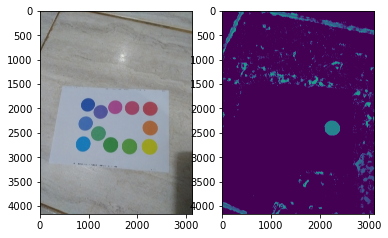

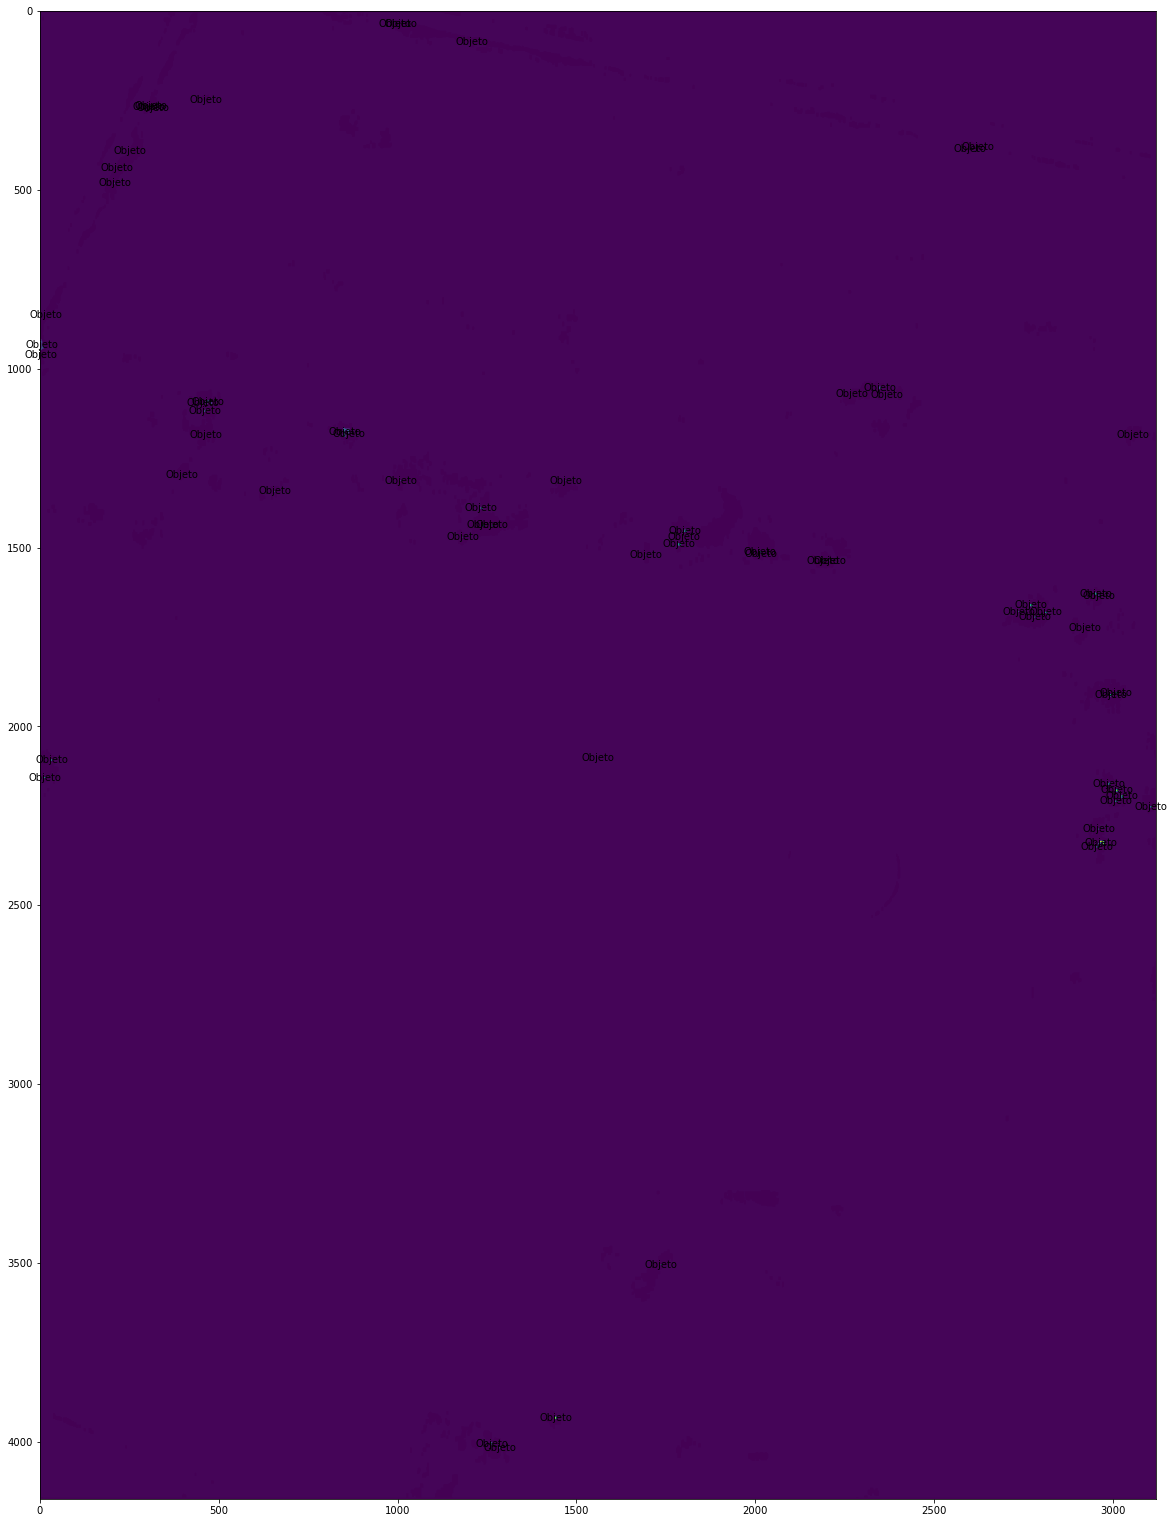

In [6]:
from scipy import *
from pylab import *
from numpy import *
from PIL import Image
import cv2
from scipy.ndimage import measurements, morphology
figure()
im = cv2.imread('segmentacaoCores/papel2.jpg')
subplot(1,2,1)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
imshow(im)
im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
im[:,:,2] = (im[:,:,0] >= 8) * im[:,:,2] 
im[:,:,2] = (im[:,:,0] < 22) * im[:,:,2]
im = cv2.cvtColor(cv2.cvtColor(im, cv2.COLOR_HSV2BGR),cv2.COLOR_BGR2GRAY)
subplot(1,2,2)
imshow(im)
im = 1*(im>120)
im = 1*(im!=1)
im_open = morphology.binary_opening(im, ones((9,5)), iterations=1)
im_closed = morphology.binary_closing(im, ones((9,5)))

labels, nbr_objects = measurements.label(im_closed)
center_of_mass = array(measurements.center_of_mass(im_closed, labels=labels, index=range(1,nbr_objects+1) ), dtype=float)
print(center_of_mass)
print("number of objects: "+str(nbr_objects)+"    labels:"+str(labels.shape))
figure(figsize=(20,100))
imshow(labels)

for i in range(nbr_objects):
    text(center_of_mass[i][1], center_of_mass[i][0], 'Objeto', color='black', horizontalalignment='center',verticalalignment='center')

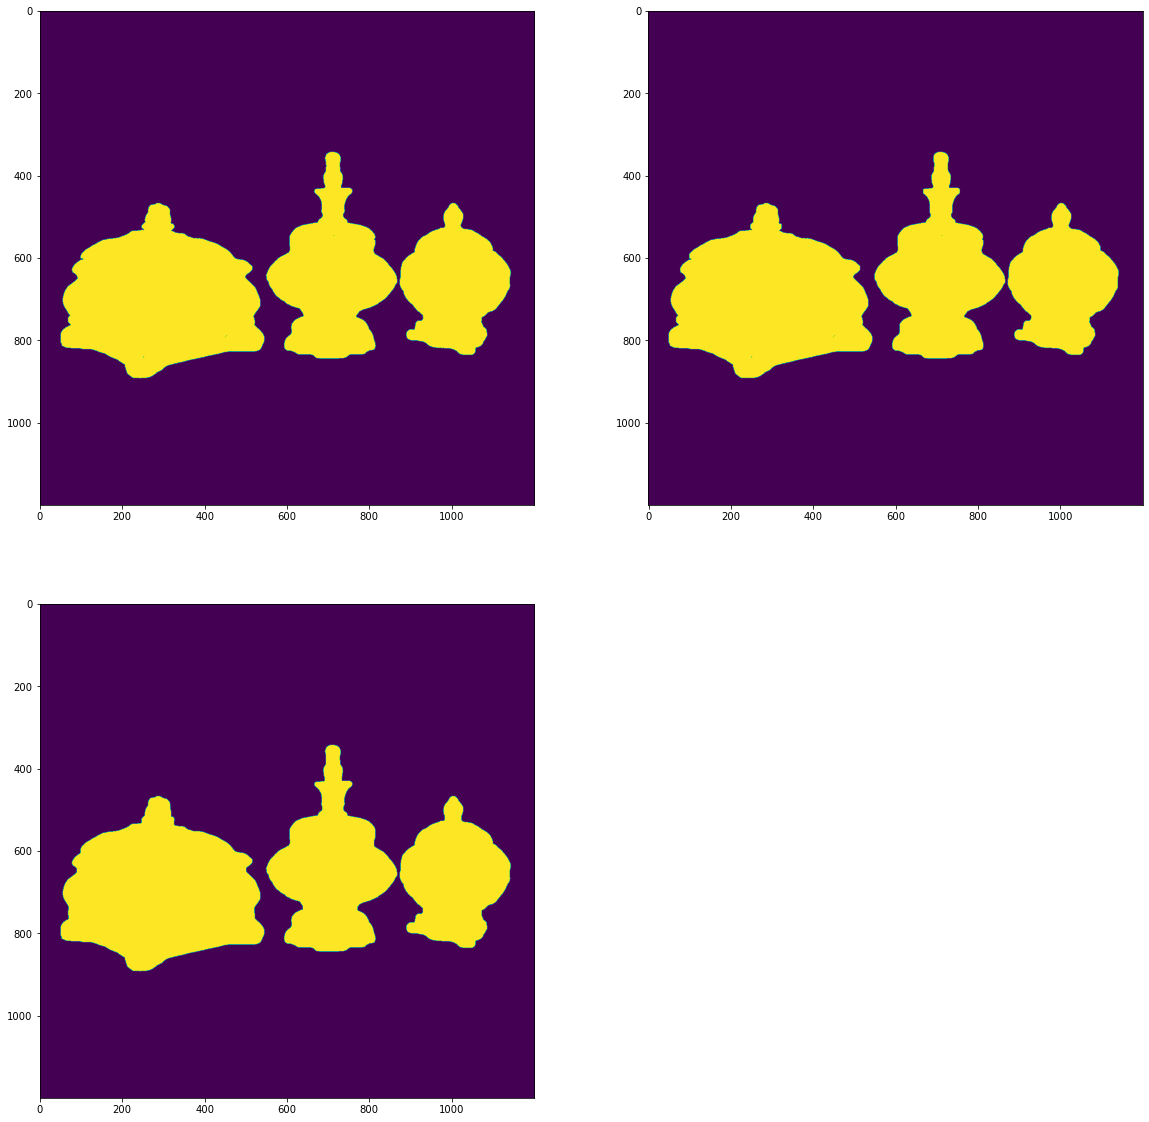

In [2]:
figure(figsize=(20,20))
subplot(2,2,1)
imshow(im)
subplot(2,2,2)
imshow(im_open)
subplot(2,2,3)
imshow(im_closed)

In [67]:
import cv2
from pylab import *

a = cv2.imread('segmentacaoCores/papel1.jpg')
a = cv2.cvtColor(a, cv2.COLOR_BGR2HSV)
a[:,:,2] = (a[:,:,0] >= 10) * a[:,:,2]
a[:,:,2] = (a[:,:,0] < 30) * a[:,:,2]
a = cv2.cvtColor(a, cv2.COLOR_HSV2RGB)
print(a.max())

255


[255 127   0]


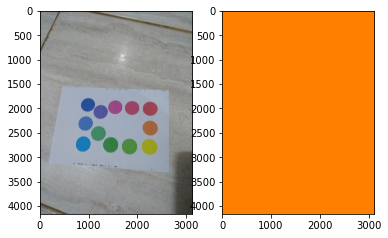

In [20]:
from scipy import *
from pylab import *
from numpy import *
from PIL import Image
import cv2
from scipy.ndimage import measurements, morphology
figure()
im = cv2.imread('segmentacaoCores/papel2.jpg')
subplot(1,2,1)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
imshow(im)
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
im_hsv[:,:,:] = 255
im_hsv[:,:,0] = 15
im_hsv = cv2.cvtColor(im_hsv, cv2.COLOR_HSV2RGB)
subplot(1,2,2)
imshow(im_hsv)
print(im_hsv[0,0,:])